## Python worlds forest map

source: https://towardsdatascience.com/creating-beautiful-forest-maps-with-python-59a60fba3e27

### Contents
0. Get the raw data and install the packages
1. Make the map

## 0. Install packages and get the raw data

It's best to create a new environment especially for rasterio. Do so with Ananconda and conda install
Next install the packages


In [8]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 8.7 MB/s eta 0:00:00
     -------------------------------------- 898.1/898.1 KB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 51.5/51.5 KB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 3.2/3.2 MB 10.9 MB/s eta 0:00:00


In [10]:
#check all installs
import rasterio
import matplotlib.pyplot as plt
print('done')

done


In [1]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks'

In [2]:
!mkdir trees

In [4]:
cd trees

C:\Users\31653\Documents\GitHub\Notebooks\trees


In [5]:
#DO NOT USE!
!git clone https://github.com/globalmaps/gm_ve_v2

Cloning into 'gm_ve_v2'...
Updating files:  61% (8/13)
Updating files:  69% (9/13)
Updating files:  76% (10/13)
Updating files:  84% (11/13)
Updating files:  92% (12/13)
Updating files: 100% (13/13)
Updating files: 100% (13/13), done.


In [6]:
#DO USE!
!git clone https://github.com/globalmaps/gm_ve_v1

Cloning into 'gm_ve_v1'...


In [3]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks'

In [4]:
cd trees/gm_ve_v1

C:\Users\31653\Documents\GitHub\Notebooks\trees\gm_ve_v1


In [23]:
#extract a zipfile
import zipfile
with zipfile.ZipFile('gm_ve_v1.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
ls

 Volume in drive C is OS
 Volume Serial Number is 2818-58FB

 Directory of C:\Users\31653\Documents\GitHub\Notebooks\trees\gm_ve_v1

06/03/2022  10:50    <DIR>          .
06/03/2022  10:30    <DIR>          ..
06/03/2022  10:50        91.258.317 gm_ve_v1.tif
06/03/2022  10:30        80.454.632 gm_ve_v1.zip
06/03/2022  10:30               691 README.md
               3 File(s)    171.713.640 bytes
               2 Dir(s)  217.192.316.928 bytes free


## 1. Make the map

In [6]:
import rasterio
import numpy as np
from rasterio.crs import CRS

forests_file = rasterio.open('gm_ve_v1.tif')
forests = forests_file.read()

print(np.amin(forests))
print(np.amax(forests))
print(len(np.unique(forests)))

0
254
102


In [15]:
type(forests)

numpy.ndarray

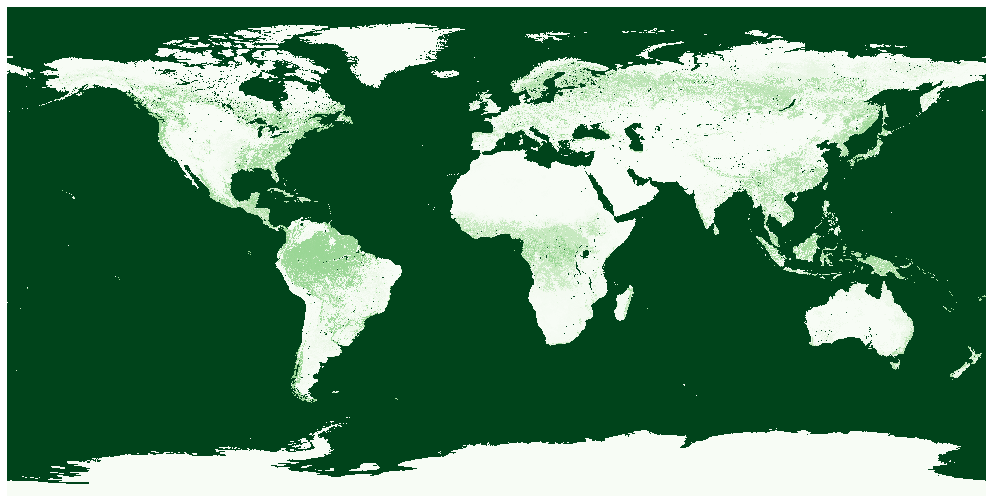

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = plt.axes()
fig.set_size_inches(18, 9)

imgs = plt.imshow(forests[0],
                  cmap='Greens',
                  interpolation='nearest')

ax.axis('off')
plt.show()

In [14]:
#adjust the colors, make the sea white
from matplotlib.colors import ListedColormap
from matplotlib import cm

forests[0][forests[0] == 254] = 0.0

ourcmap = cm.get_cmap('Greens', 101)
newcolors = ourcmap(np.linspace(0, 1, 101))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
newcmp_forests = ListedColormap(newcolors)

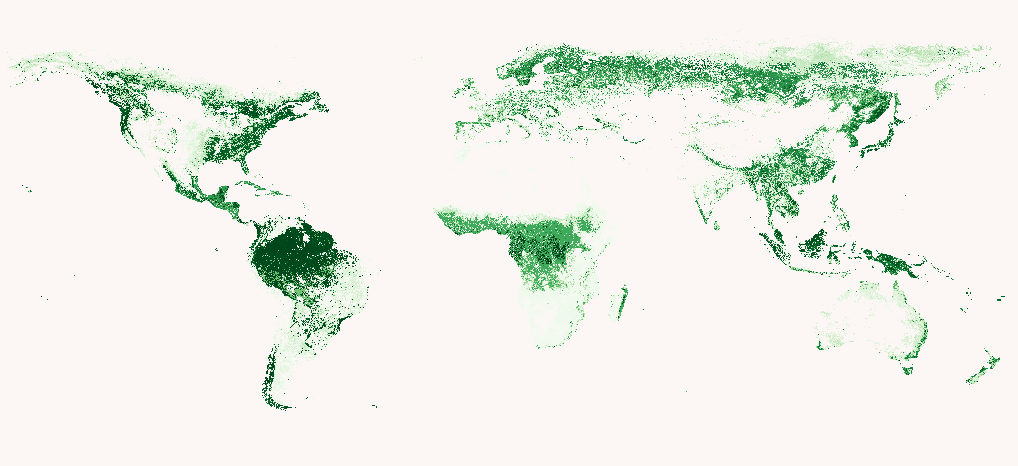

In [17]:
#plot again with some improvements
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='#FCF6F5FF')
ax = plt.axes()
fig.set_size_inches(18, 9)
ax.patch.set_facecolor('#FCF6F5FF')

imgs = plt.imshow(forests[0],
                  cmap=newcmp_forests,
                  interpolation='nearest')

ax.set_xlim(2000, 43500)
ax.set_ylim(19500, 800)
ax.axis('off')
plt.show()

In [19]:
!pip install rioxarray

     -------------------------------------- 47.8/47.8 KB 482.0 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 6.3/6.3 MB 8.8 MB/s eta 0:00:00
     ------------------------------------- 870.9/870.9 KB 13.9 MB/s eta 0:00:00
     --------------------------------------- 10.6/10.6 MB 10.9 MB/s eta 0:00:00
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
  Created wheel for rioxarray: filename=rioxarray-0.10.2-py3-none-any.whl size=55519 sha256=66ea6a301f02217d73526523e5a35f4589d37d36b13e09aff4875aa723e335e5
  Stored in directory: c:\users\31653\appdata\local\pip\cache\wheels\33\d0\5e\8bd5964aa9f262a5e744f6e203259dde2c16d8e9f1ff4a1c7f
Successfu

In [21]:
import rioxarray as rxr #extends xarray with the rio accessor and allows rasters from tiff and geotiff files to be clipped, merged and reprojected
from rasterio.crs import CRS

forests_file = rxr.open_rasterio('gm_ve_v1.tif', masked=True).squeeze()
crs_rob = CRS.from_string('+proj=robin')
forests = forests_file.rio.reproject(crs_rob)
forests = forests.to_numpy()

(19500.0, 800.0)

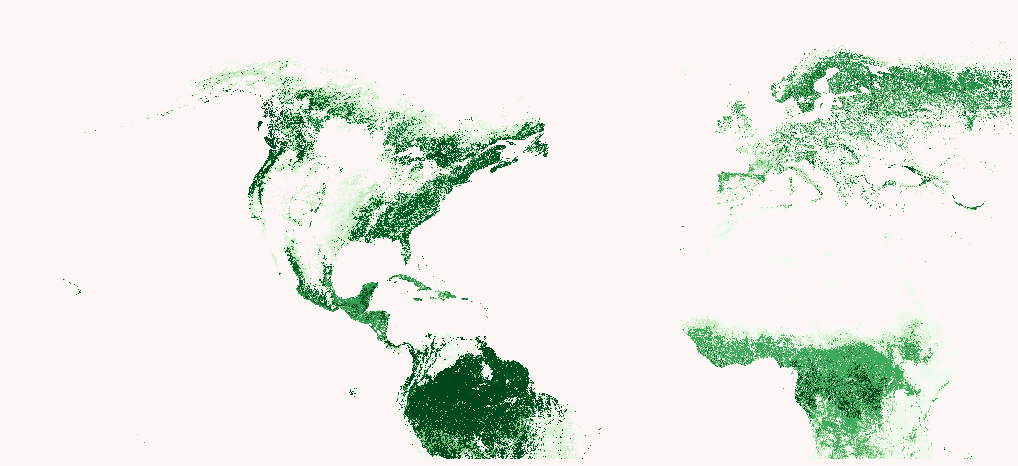

In [22]:
forests[forests > 100] = 0.0

fig = plt.figure(facecolor='#FCF6F5FF')

ax = plt.axes()
fig.set_size_inches(18, 9)
ax.patch.set_facecolor('#FCF6F5FF')

imgs = plt.imshow(forests,
                  cmap=newcmp_forests,
                  interpolation='nearest')
ax.axis('off')
ax.set_xlim(2000, 43500)
ax.set_ylim(19500, 800)